# Phys555 Assignment 1 Question 2

SVD for face recognition. Explain how it works and show some examples. Bonus: Implement it on a (B&W) image data set with adequate explanation.

## Singular Value Decomposition for Facial Recognition

Singular value decomposition is one of the most general and well used tools in linear algebra, and can be used for dimensionality reduction. It can be thought of as the data-driven generalization of the Fourier transform. SVD can be used as the basis for PCA. 

X is a collection of column vectors, up to dimension m. A face image can be reshaped into a tall skinny column vector, which could be X1 (person 1). Up to Xm, m people. N is the dimension of the reshaped X vectors, M is the number of reshaped X vectors that we have. 

SVD allows us to decompose, or represent it, as the product of three other matrices: 
$X = UΣV^{T}$

U (left singular vectors) and V (right singular vectors) are unitary (orthogonal) matrices, and Σ is diagonal (sgima are singular values).

M columns of X go with M columns of sigma values.

Columns of U have the same shape as the columns of X. In the example of faces, these are eigenfaces. Heirarchicly arranged in ability to describe variance in the columns of X. 

$U^{T}U = I$ nxn

$V^{T}V = I$ mxm

Σ diagonal, sigma1 >= sigma2 >= signam >= 0

meaning its transpose is it's inverse.

First columns of U and V are more important than the second column (and so on) in describing the information in the data matrix X. Relative importance is given by corresponding singular value.

This means we can chop off non-important columns off the end. 

Each V is a snapshot of how the corresponding U changes over the space. First column of transpose, exact mixture of all columns of U to add them up to equal X1, scaled by the singular value. V are mixtures of U's to make X's. 

These are easy to compute in script. Also guaranteed to exist. Unique (up to flipping the sign). 

Only the first m columns of U are important in representing the data. 

Actually doing the calculations: 

X = sigma1U1V1^T + sigma2U2V2^T + ... + sigmamUmVm^T + 0 (There are only m sigma values, everything after m gets multiplied by a zero) 

X = Uhat Sigmahat V^T (where hat means m dimensions), called the economy SVD, what u wanna do with tall skinny matrices 

X = sigma * column vector * row vector, turns into outer product multiplication 

Decomposing X into orthogonal basis U and V, where they increasingly improve the approximation of X. Where sigma1u1v1^T is  the best. 

Often will truncate those multiplications at rank R, where R<m, where U tilda* sigma tilda* Vtilda tranpose (Eckard Young Theorem)

Eckard Young Theorem for determining cut off 

Once truncated, identity matrix thingies go away

orthogonal: dot product equals identity matrix



X = 
    \begin{bmatrix}
        | & | & \ & | \\
        x_{1} & x_{2} & \dots & x_{m} \\
        | & | & \ & |
    \end{bmatrix}

U = 
    \begin{bmatrix}
        | & | & \ & | \\
        u_{1} & u_{2} & \dots & u_{m} \\
        | & | & \ & |
    \end{bmatrix}

Σ = 
\begin{bmatrix}
\sigma_{1} & 0 & \dots & 0 \\
0 & \sigma_{2} & \dots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \dots & \sigma_{n} \\
0 & 0 & \vdots & 0 \\
\end{bmatrix}

$V^{T}$ = 
\begin{bmatrix}
    - & V_{1}^T & - \\
    - & V_{2}^T & - \\
    \ & \vdots &  \ \\
    - & V_{n}^T & - \\
\end{bmatrix}



In [2]:
# QUESTIONS: Is what I've done enough for the bonus? 

# Import the necessary packages
from sklearn.datasets import fetch_olivetti_faces
from sklearn import decomposition
from numpy.random import RandomState
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np
from matplotlib import pyplot as plt
from sklearn import cluster
import pandas as pd 
from sklearn.feature_extraction.image import extract_patches_2d
from numpy import asarray

(929, 697, 3)
(929, 697)
(929, 929)


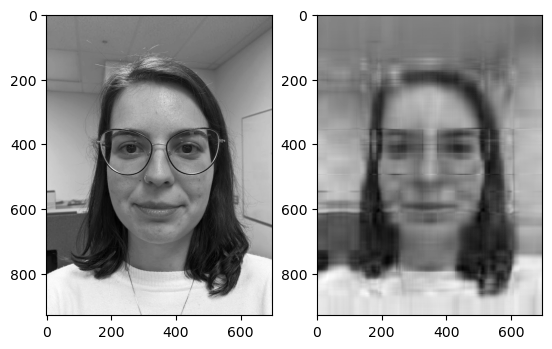

In [3]:
# Using my friend Mariana as an example 

# Load her face in as a jpg
image = Image.open('mariana.jpg')

# Convert the image into an array 
image = img_to_array(image)

# Print the shape of the array
print(image.shape)

# Calculate the mean of the array on axis 2 (IDK WHY AXIS 2??)
img = np.mean(image,axis=2)

# Print the shape 
print(img.shape)

#plt.imshow(img,'gray')
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(img,'gray')
img.shape

# Center the image at the mean
X_centered = img - img.mean()

# calculate U, sigma, and V for SVD
U, sigma, V = np.linalg.svd(X_centered)
print(U.shape)

# Using sigma components from a:b
a=0
b=10

# reconstruct the original matrix using U, V transpose, and sigma
reconstructed= np.matrix(U[:, a:b]) * np.diag(sigma[a:b]) * np.matrix(V[a:b, :])
ax2.imshow(reconstructed,'gray')


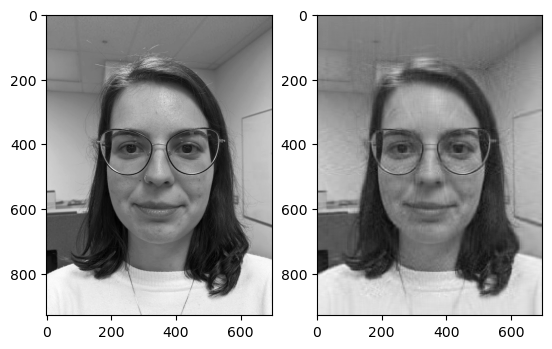

In [4]:
# Now demonstrating while keeping more singular vectors and singular values

fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(img,'gray')
img.shape

a=0
b=40

# reconstruct the original matrix using U, V transpose, and sigma
reconstructed= np.matrix(U[:, a:b]) * np.diag(sigma[a:b]) * np.matrix(V[a:b, :])
ax2.imshow(reconstructed,'gray')

In [5]:
def plot_gallery(title, images, n_col, n_row, cmap=plt.cm.gray):
    fig, axs = plt.subplots(
        nrows=n_row,
        ncols=n_col,
        figsize=(2.0 * n_col, 2.3 * n_row),
        facecolor="white",
        constrained_layout=True,
    )
    fig.set_constrained_layout_pads(w_pad=0.01, h_pad=0.02, hspace=0, wspace=0)
    fig.set_edgecolor("black")
    fig.suptitle(title, size=16)
    for ax, vec in zip(axs.flat, images):
        vmax = max(vec.max(), -vec.min())
        im = ax.imshow(
            vec.reshape(image_shape),
            cmap=cmap,
            interpolation="nearest",
            vmin=-vmax,
            vmax=vmax,
        )
        ax.axis("off")

    fig.colorbar(im, ax=axs, orientation="horizontal", shrink=0.99, aspect=40, pad=0.01)
    plt.show()

Dataset consists of 400 faces


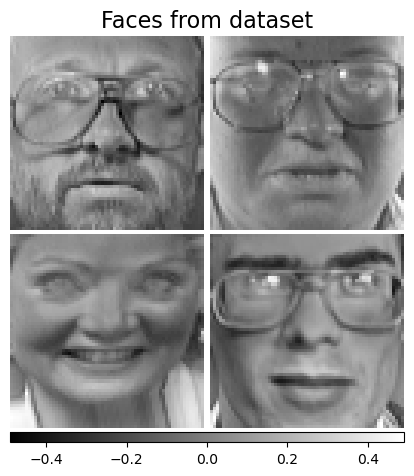

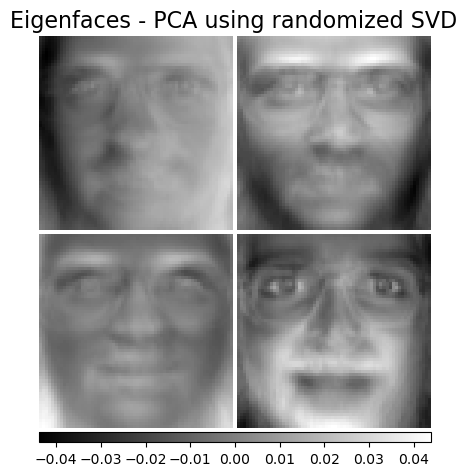

In [21]:
rng = RandomState(0)

faces, _ = fetch_olivetti_faces(return_X_y=True, shuffle=True, random_state=rng)
n_samples, n_features = faces.shape

# Global centering (focus on one feature, centering all samples)
faces_centered = faces - faces.mean(axis=0)

# Local centering (focus on one sample, centering all features)
faces_centered -= faces_centered.mean(axis=1).reshape(n_samples, -1)

print("Dataset consists of %d faces" % n_samples)

n_row, n_col = 2, 2
n_components = n_row * n_col
image_shape = (64, 64)

plot_gallery("Faces from dataset", faces_centered[:n_components], n_col, n_row)

pca_estimator = decomposition.PCA(n_components=n_components, svd_solver="full", whiten=True)

pca_estimator.fit(faces_centered)

plot_gallery("Eigenfaces - PCA using randomized SVD", pca_estimator.components_[:n_components], n_col, n_row)


(400, 64, 64)
(400, 4096)


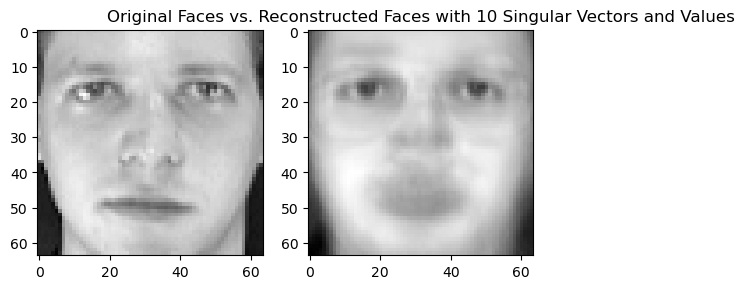

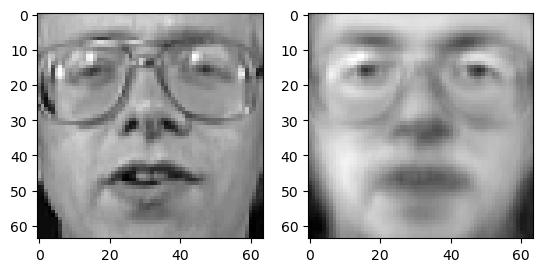

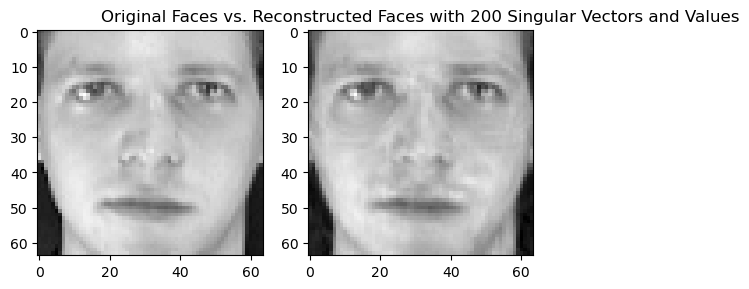

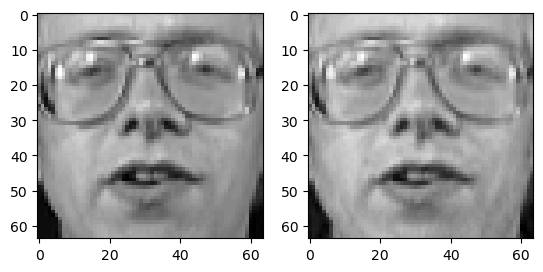

In [23]:
faces = fetch_olivetti_faces()
img = faces.images
print(img.shape) # (400, 64, 64), so 400 images that are 64x64

# Want to make that (400, 64)
condensed = img.reshape(400,-1)
print(condensed.shape)

# Do SVD
U, sigma, V = np.linalg.svd(condensed)

# Pull out faces from this
a=0
b=10
reconstructed= np.matrix(U[:, a:b]) * np.diag(sigma[a:b]) * np.matrix(V[a:b, :])

# Plot faces 0 and 10 as an example with 10 singular vectors & values
fig3, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(faces.images[0], 'gray')
ax2.imshow(reconstructed[0].reshape(64,64), 'gray')
plt.title('Original Faces vs. Reconstructed Faces with 10 Singular Vectors and Values')

fig4, (ax12, ax22) = plt.subplots(1,2)
ax12.imshow(faces.images[10], 'gray')
ax22.imshow(reconstructed[10].reshape(64,64), 'gray')   

# Plot faces 0 and 10 as an example with 200 singular vectors & values
a=0
b=200
reconstructed= np.matrix(U[:, a:b]) * np.diag(sigma[a:b]) * np.matrix(V[a:b, :])

fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(faces.images[0], 'gray')
ax2.imshow(reconstructed[0].reshape(64,64), 'gray')
plt.title('Original Faces vs. Reconstructed Faces with 200 Singular Vectors and Values')

fig2, (ax12, ax22) = plt.subplots(1,2)
ax12.imshow(faces.images[10], 'gray')
ax22.imshow(reconstructed[10].reshape(64,64), 'gray')           


## References

Blog for help: https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/

https://scikit-learn.org/stable/auto_examples/decomposition/plot_faces_decomposition.html

https://www.youtube.com/watch?v=nbBvuuNVfco&ab_channel=SteveBrunton
https://www.youtube.com/watch?v=xy3QyyhiuY4&ab_channel=SteveBrunton
https://www.youtube.com/watch?v=WmDnaoY2Ivs&ab_channel=SteveBrunton